# Overview

This is my First Machine Learning Project
Data Science 
Machine Learning

This Notebook an Attempt for the Kaggle Competition  [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)



## Workflow Stages

1.   Define Problems
2.   Acquire Training and Testing Data
3.   Data Visualization


## Goal

*   It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable
*   What Sorts of People Were More Likely to Srvive the Titanic Sinking





## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy

## Submission File Format

# Aquire Data

Mount Google Drive to This Notebook

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Configure Path to kaggle.json

In [33]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

Change Current Working Directory

In [34]:
%cd /content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets

/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets


Download Titanic Datasets from Kaggle

In [35]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


# Data Analyze

## Describing Data

Some Non-Relevant Columns Can be Dropped (Prehaps  

In [36]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 Passengers in the Training Dataset, But There is Only 714 Age Data Meaning Imputation for Age is Required to Fill the Missing Values.

In [38]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
train.shape

(891, 12)

In [41]:
test.shape

(418, 11)

Count the Value of Survived(1) and Deceased(0) Pessengers

In [42]:
survived = train['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

Count the Value of Male and Female Passengers

In [43]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [44]:
sur_sex = pd.crosstab(train['Survived'], train['Sex'])
sur_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


Survive and Decease by Class

In [45]:
sur_cla = pd.crosstab(train['Survived'], train['Pclass'])
sur_cla

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## Plot Graphs

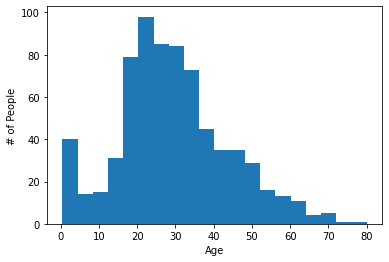

In [61]:
import matplotlib.pyplot as plt
plt.hist(train['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('# of People')
plt.show()

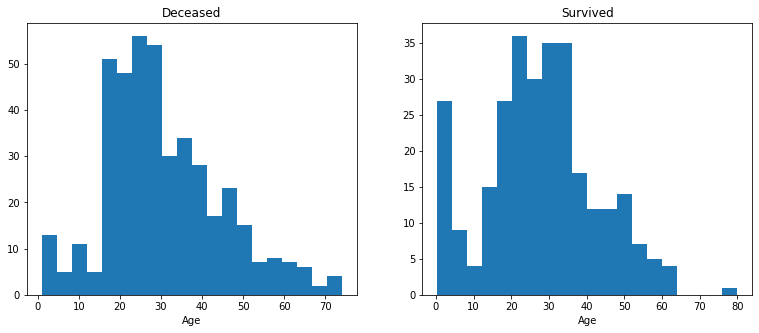

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_title('Deceased')
ax[1].set_title('Survived')
ax[0].hist(train['Age'].where(train['Survived']==0), bins=20)
ax[1].hist(train['Age'].where(train['Survived']==1), bins=20)
plt.show()

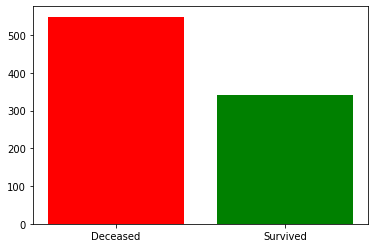

In [69]:
plt.bar(survived.index, survived, color=['r', 'g'], tick_label = ('Deceased', 'Survived'))
plt.show()

Most of the People Have Deceased

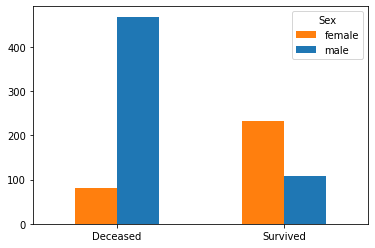

In [70]:
sur_sex.plot(kind='bar', color=['C1', 'C0'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

More Male Than Female Have Deceased

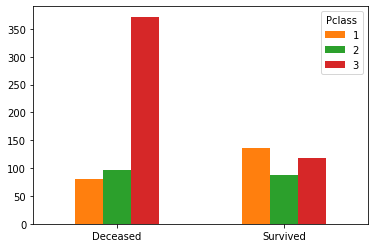

In [71]:
sur_cla.plot(kind='bar', color=['C1', 'C2', 'C3'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

# Data Preparation

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

# Conclusion